PASO 1: Descargar el Conjunto de Datos desde Google Drive


In [1]:
# Importamos las bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
# Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from imblearn.over_sampling import SMOTE

# 1. Instalamos librerías necesarias para trabajar con Google Sheets
!pip install --upgrade gspread gspread-dataframe

# 2. Importamos librerías de Google
import gspread
from gspread_dataframe import get_as_dataframe
from google.colab import auth
from oauth2client.client import GoogleCredentials

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.0/60.0 kB 3.3 MB/s eta 0:00:00
  Attempting uninstall: gspread
    Found existing installation: gspread 6.2.0
    Uninstalling gspread-6.2.0:
      Successfully uninstalled gspread-6.2.0


In [2]:
import gspread
from google.colab import auth
from google.auth import default

# Autenticarse en Google
auth.authenticate_user()

# Obtener credenciales correctas
creds, _ = default()

# Autorizar gspread con las credenciales modernas
gc = gspread.authorize(creds)


In [14]:

spreadsheet = gc.open_by_url('https://docs.google.com/spreadsheets/d/19b4TG9pyxsxjeXBnU0AHPRE-Bfn7TxUTIcEK9rt_s80/edit?usp=sharing')
worksheet = spreadsheet.get_worksheet(0)

# Cargar en dataframe
df = get_as_dataframe(worksheet)

# Mostrar
df.head()


,Año,Reactivo,Cantidad consumida anual (ml),Stock promedio disponible,Faltante,Motivo desabastecimiento,Tiempo reposicion dias,Num. de estudiantes afectados
0,2019.0,Formaldehído,3000.0,800.0,Sí,Retraso logístico,60,180.0
1,2019.0,Heparina,100.0,20.0,Sí,Falta de presupuesto,-,150.0
2,2019.0,Solución salina,10.0,5.0,No,-,-,0.0
3,2019.0,Azul de Metileno,80.0,60.0,No,-,-,100.0
4,2019.0,Alcohol etílico,18.0,4.0,Sí,Aumento en demanda,10,200.0


In [15]:
# Análisis Exploratorio de Datos (EDA)
# 1. Información básica del dataset
print("\n=== Estructura del DataFrame ===")
print(df.info())
print("\n=== Primeras filas ===")
print(df.head())
print("\n=== Estadísticas descriptivas ===")
print(df.describe())


=== Estructura del DataFrame ===
<class 'pandas.core.frame.DataFrame'>
Index: 54 entries, 0 to 53
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Año                            54 non-null     float64
 1   Reactivo                       54 non-null     object 
 2   Cantidad consumida anual (ml)  54 non-null     float64
 3   Stock promedio disponible      54 non-null     float64
 4   Faltante                       54 non-null     object 
 5   Motivo desabastecimiento       54 non-null     object 
 6   Tiempo reposicion dias         54 non-null     object 
 7   Num. de estudiantes afectados  54 non-null     float64
dtypes: float64(4), object(4)
memory usage: 3.8+ KB
None

=== Primeras filas ===
      Año          Reactivo  Cantidad consumida anual (ml)  \
0  2019.0      Formaldehído                         3000.0   
1  2019.0          Heparina                          100.0   
2 

In [16]:
# 2. Análisis de valores faltantes
print("\n=== Valores faltantes ===")
print(df.isnull().sum())



=== Valores faltantes ===
Año                              0
Reactivo                         0
Cantidad consumida anual (ml)    0
Stock promedio disponible        0
Faltante                         0
Motivo desabastecimiento         0
Tiempo reposicion dias           0
Num. de estudiantes afectados    0
dtype: int64


In [17]:
df.columns

Index(['Año', 'Reactivo', 'Cantidad consumida anual (ml)',
       'Stock promedio disponible', 'Faltante', 'Motivo desabastecimiento',
       'Tiempo reposicion dias', 'Num. de estudiantes afectados'],
      dtype='object')

In [18]:
# 3. Análisis de variables categóricas
print("\n=== Frecuencia de reactivos ===")
print(df['Reactivo'].value_counts())
print("\n=== Frecuencia de motivos ===")
print(df['Motivo desabastecimiento'].value_counts())


=== Frecuencia de reactivos ===
Reactivo
Formaldehído             6
Heparina                 6
Solución salina          6
Eosina Y                 6
Azul de Metileno         5
Alcohol etílico          5
Xileno                   5
Urease                   2
Gram Stain Kit           2
Agar Nutritivo           2
Antibiótico Disco        2
Plasma sanguíneo         1
Tinción Ziehl-Neelsen    1
Anticuerpo Anti-A        1
Anticuerpo Anti-B        1
Agar MacConkey           1
Agar Sangre              1
Buffer PBS               1
Name: count, dtype: int64

=== Frecuencia de motivos ===
Motivo desabastecimiento
-                       17
Agotamiento rápido       8
Retraso logístico        7
Falta de presupuesto     6
Demora en entrega        6
Aumento en demanda       5
Logística interna        5
Name: count, dtype: int64


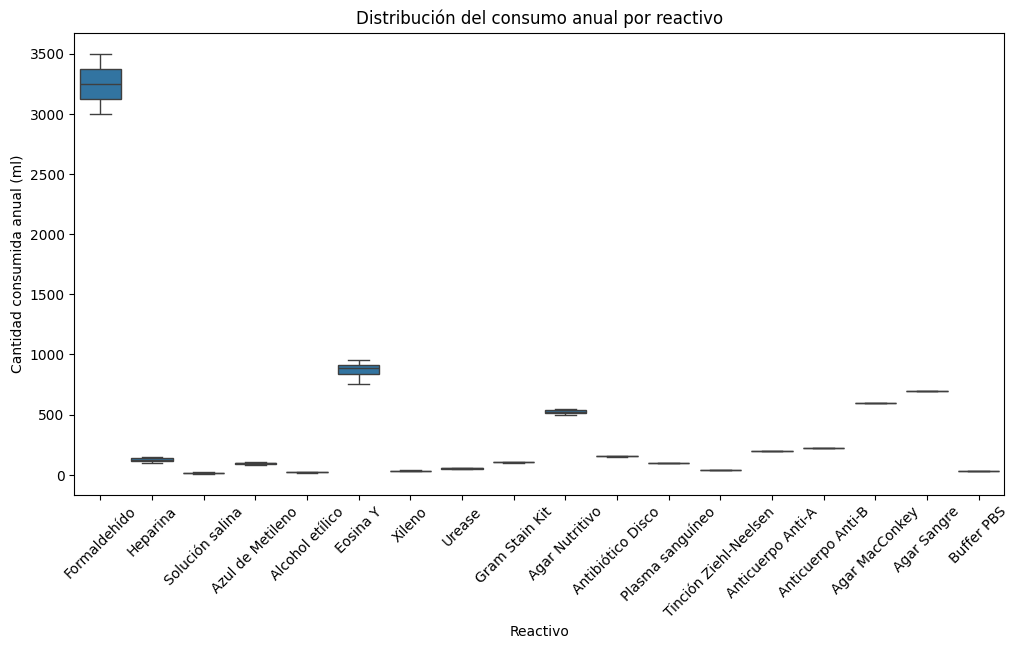

In [19]:
# 4. Visualizaciones
plt.figure(figsize=(12, 6))
sns.boxplot(x='Reactivo', y='Cantidad consumida anual (ml)', data=df)
plt.title('Distribución del consumo anual por reactivo')
plt.xticks(rotation=45)
plt.show()

In [20]:
# Preprocesamiento para clustering
# 1. Convertir variables categóricas
df['Faltante'] = df['Faltante'].map({'Sí': 1, 'No': 0})
df = pd.get_dummies(df, columns=['Reactivo', 'Motivo desabastecimiento'], drop_first=True)


In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer


# 2. Manejar valores faltantes (llenar con 0 donde sea apropiado)
imputer = SimpleImputer(strategy='constant', fill_value=0)
df_imputed = pd.DataFrame(imputer.fit_transform(df.select_dtypes(include=[np.number])),
                         columns=df.select_dtypes(include=[np.number]).columns)

In [22]:
# 3. Escalado de características
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_imputed)

In [23]:
# Determinación del número óptimo de clusters (Método del codo)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

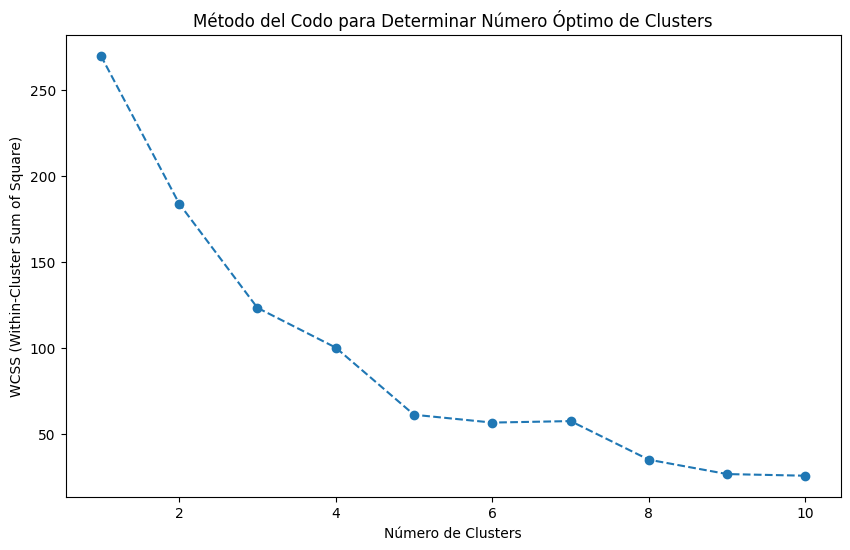

In [24]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Método del Codo para Determinar Número Óptimo de Clusters')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Square)')
plt.show()

In [29]:
# Aplicación de K-Means (asumiendo 5 clusters basado en el método del codo)
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(scaled_features)


In [30]:
# Visualización con PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)

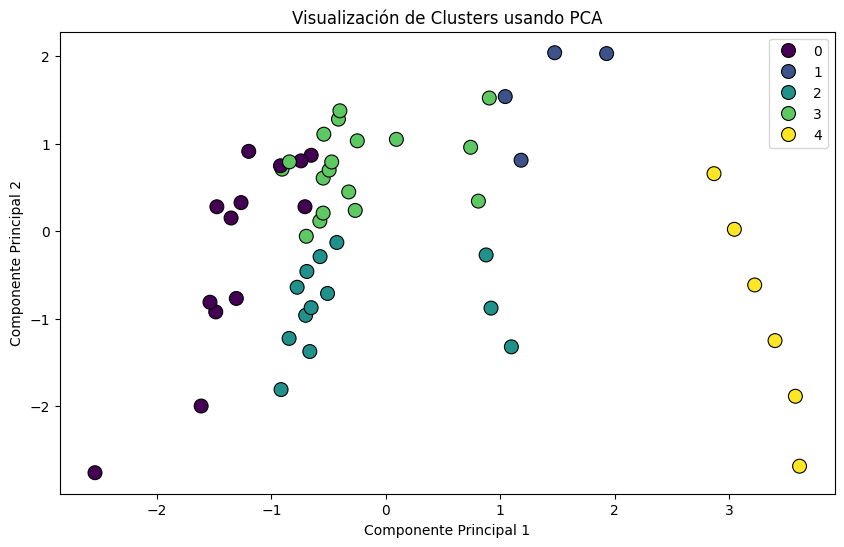

In [31]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=principal_components[:, 0], y=principal_components[:, 1],
                hue=clusters, palette='viridis', s=100, edgecolor='k')
plt.title('Visualización de Clusters usando PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()

In [34]:
import pandas as pd
import numpy as np

# Añadir la columna de clusters
df['Cluster'] = clusters

# Seleccionar solo las columnas numéricas
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Calcular la media por cluster solo para las columnas numéricas
cluster_analysis = df.groupby('Cluster')[numeric_cols].mean()

print("\n=== Características de los Clusters ===")
cluster_analysis


=== Características de los Clusters ===


,Año,Cantidad consumida anual (ml),Stock promedio disponible,Faltante,Num. de estudiantes afectados,Cluster
Cluster,,,,,,
0,2022.076923,110.000000,77.692308,0.0,130.769231,0.0
1,2023.250000,587.500000,400.000000,0.0,322.500000,1.0
2,2020.153846,224.923077,64.615385,1.0,204.615385,2.0
3,2023.000000,203.388889,37.222222,1.0,220.000000,3.0
4,2021.500000,3250.000000,550.000000,1.0,221.666667,4.0
